In [5]:
!pip install yfinance
!pip install pandas
!pip install matplotlib
!pip install plotly
!pip install tensorflow

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
# Replace 'AAPL' with the stock symbol of your choice
stock_symbol = 'AAPL'
start_date = '2020-01-01'
end_date = '2023-01-01'

# Fetch historical stock data
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [8]:
# Extract the 'Close' prices
data = stock_data[['Close']].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [9]:
# Create sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(x), np.array(y)

# Set sequence length
sequence_length = 10

# Create sequences
x, y = create_sequences(scaled_data, sequence_length)

# Reshape data for LSTM
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [10]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
model.fit(x, y, epochs=10, batch_size=32)


Epoch 1/10
24/24 [==============================] - 6s 14ms/step - loss: 0.0869
Epoch 2/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0074
Epoch 3/10
24/24 [==============================] - 0s 14ms/step - loss: 0.0031
Epoch 4/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0020
Epoch 5/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 6/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 7/10
24/24 [==============================] - 0s 14ms/step - loss: 0.0018
Epoch 8/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0019
Epoch 9/10
24/24 [==============================] - 0s 13ms/step - loss: 0.0018
Epoch 10/10
24/24 [==============================] - 0s 14ms/step - loss: 0.0017


24/24 [==============================] - 2s 8ms/step


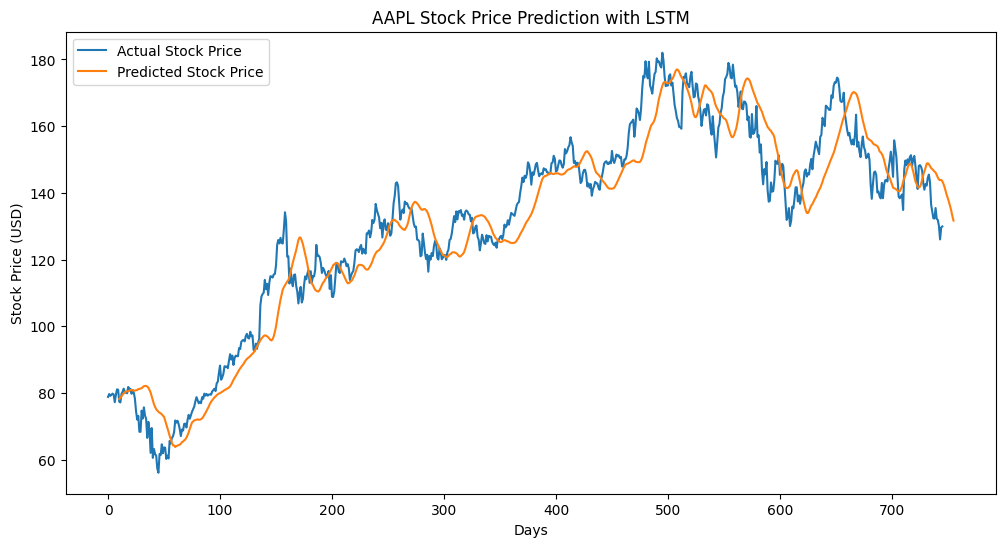

In [11]:
# Generate predictions
predictions = model.predict(x)

# Invert predictions to original scale
predictions = scaler.inverse_transform(predictions)

# Plot predictions
train = stock_data[['Close']].iloc[sequence_length:].values
train_plot = np.empty_like(data)
train_plot[:, :] = np.nan
train_plot[sequence_length:len(predictions) + sequence_length, :] = predictions

plt.figure(figsize=(12, 6))
plt.plot(train, label='Actual Stock Price')
plt.plot(train_plot, label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction with LSTM')
plt.xlabel('Days')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()
